# RAMP : Prediction of the field of graduate studies for French students

Jules Dupont, Ambroise Bertin, Suzanne Guilteaux, Maelle Cornec, Lauriane Mousset (Université Paris-Saclay, AgroParisTech - DataCamp 2023)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# Data Loading

In [2]:
PATH_DATA = "data/train.csv"
df_train = pd.read_csv(PATH_DATA, sep=",")
df_train.head()

annee     diplome numero_de_l_etablissement            etablissement  \
0   2014  MASTER LMD                  0720916E                  Le Mans   
1   2018  MASTER LMD                  0440984F                   Nantes   
2   2014  MASTER LMD                  0941111X        Paris-Est Créteil   
3   2018  MASTER ENS                  0211237F        Dijon - Bourgogne   
4   2017  MASTER LMD                  0060931E  Nice - Sophia-Antipolis   

            etablissementactuel code_de_l_academie academie code_du_domaine  \
0                           NaN                A17   Nantes             DEG   
1             Nantes Université                A17   Nantes             DEG   
2                           NaN                A24  Créteil             STS   
3                           NaN                A07    Dijon            MEEF   
4  Université Côte d'Azur (UCA)                A23     Nice             DEG   

                           domaine code_de_la_discipline  ...  \
0       Droit, économie et gestion                disc04  ...   
1       Droit, économie et gestion                disc02  ...   
2  Sciences, technologies et santé                disc12  ...   
3             Masters enseignement                disc18  ...   
4       Droit, économie et gestion                disc05  ...   

  taux_de_chomage_regional salaire_net_mensuel_median_regional emplois_cadre  \
0                      8.0                              1760.0           NaN   
1                      6.7                              1830.0          74.0   
2                      8.3                              2050.0          70.0   
3                      6.6                              1820.0          91.0   
4                      9.1                              1840.0           NaN   

   emplois_exterieurs_a_la_region_de_luniversite  femmes  \
0                                            NaN     NaN   
1                                           45.0    64.0   
2                                           21.0    42.0   
3                                           17.0    74.0   
4                                            NaN     NaN   

   salaire_net_mensuel_regional_1er_quartile  \
0                                     1430.0   
1                                     1470.0   
2                                     1610.0   
3                                     1440.0   
4                                     1400.0   

   salaire_net_mensuel_regional_3eme_quartile                    cle_etab  \
0                                      2060.0                  Le Mans_18   
1                                      2180.0                   Nantes_30   
2                                      2560.0        Paris-Est Créteil_18   
3                                      2160.0        Dijon - Bourgogne_30   
4                                      2220.0  Nice - Sophia-Antipolis_30   

    cle_disc  id_paysage  
0  disc04_18       9xlel  
1  disc02_30       7hB8r  
2  disc12_18       vb71K  
3  disc18_30       Lr94O  
4  disc05_30       7CYWd  

[5 rows x 35 columns]

# Data Description

In [3]:
print('The dataframe has', df_train.shape[0], 'rows and', df_train.shape[1], 'variables.')

The dataframe has 12545 rows and 35 variables.


In [4]:
df_train.columns

Index(['annee', 'diplome', 'numero_de_l_etablissement', 'etablissement',
       'etablissementactuel', 'code_de_l_academie', 'academie',
       'code_du_domaine', 'domaine', 'code_de_la_discipline', 'discipline',
       'situation', 'remarque', 'nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion', 'taux_d_emploi',
       'taux_d_emploi_salarie_en_france',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile', 'cle_etab', 'cle_disc',
       'id_paysage'],
      dtype='object')

Labels of variables in exported files (for year N):
- nombre_de_reponses: Number of responses
- taux_de_reponse: Response rate
- poids_de_la_discipline: Weight of discipline 
- emplois_cadre_ou_professions_intermediaires: Share of jobs at executive or intermediate professional level
- emplois_stables: Share of stable jobs
- emplois_a_temps_plein: Share of full-time jobs
- salaire_net_median_des_emplois_a_temps_plein: Median net monthly wage for full-time jobs
- salaire_brut_annuel_estime: Estimated median gross annual salary
- de_diplomes_boursiers: Percentage of graduates with grants in the institution
- taux_de_chomage_regional: Regional unemployment rate (INSEE: 4th quarter N+2)
- salaire_net_mensuel_median_regional: Median net monthly salary of young people aged 25 to 29 employed full-time in management and intermediate professions (INSEE: DADS N)
- taux_dinsertion: Rate of integration
- emplois_cadre : Share of jobs at executive level (in some sectors of activity, not all jobs corresponding to the diploma are at executive level; access to executive level may require prior professional experience)
- emplois_exterieurs_a_la_region_de_luniversite: Share of jobs located outside the region of the establishment (including abroad)
- femmes: Share of women

Source: [ici](https://www.data.gouv.fr/fr/datasets/insertion-professionnelle-des-diplomes-de-master-en-universites-et-etablissements-assimil-0/#/resources).

# Data Types and Missing Values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12545 entries, 0 to 12544
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   annee                                          12545 non-null  int64  
 1   diplome                                        12545 non-null  object 
 2   numero_de_l_etablissement                      12545 non-null  object 
 3   etablissement                                  12545 non-null  object 
 4   etablissementactuel                            2840 non-null   object 
 5   code_de_l_academie                             12314 non-null  object 
 6   academie                                       12314 non-null  object 
 7   code_du_domaine                                12545 non-null  object 
 8   domaine                                        12545 non-null  object 
 9   code_de_la_discipline                          125

During the preprocessing of the original datafile, we replaced non recognized strings (e.g. nd = non disponible) by NaN and gave the expected type for each variable. As a result, we can see that all data types are what was expected and that the file contains many missing values.

In [6]:
def missing_values(data):
    
    # Calculate number and proportion of missing values for each numerical column
    missing_data = pd.DataFrame(columns=['Number of Missing Values', 'Proportion'])
    length = len(df_train)

    for col in data:
        num_missing = df_train[col].isnull().sum()
        proportion_missing = num_missing / length * 100
        missing_data.loc[col] = [num_missing, proportion_missing]

    # Sort the DataFrame by the "Proportion" column in descending order
    missing_data_sorted = missing_data.sort_values(by='Proportion', ascending=False)

    return missing_data_sorted

In [7]:
missing_values(df_train.columns)

Number of Missing Values  \
taux_d_emploi                                                   11883.0   
taux_d_emploi_salarie_en_france                                 11883.0   
remarque                                                        11539.0   
etablissementactuel                                              9705.0   
salaire_net_median_des_emplois_a_temps_plein                     7236.0   
salaire_brut_annuel_estime                                       7122.0   
emplois_cadre                                                    6546.0   
emplois_exterieurs_a_la_region_de_luniversite                    6437.0   
emplois_cadre_ou_professions_intermediaires                      6240.0   
emplois_a_temps_plein                                            6206.0   
emplois_stables                                                  6167.0   
femmes                                                           5889.0   
taux_dinsertion                                                  5562.0   
salaire_net_mensuel_regional_1er_quartile                        1702.0   
salaire_net_mensuel_regional_3eme_quartile                       1702.0   
poids_de_la_discipline                                            538.0   
salaire_net_mensuel_median_regional                               414.0   
taux_de_chomage_regional                                          296.0   
id_paysage                                                        231.0   
academie                                                          231.0   
code_de_l_academie                                                231.0   
taux_de_reponse                                                   207.0   
de_diplomes_boursiers                                             120.0   
nombre_de_reponses                                                 28.0   
diplome                                                             0.0   
situation                                                           0.0   
discipline                                                          0.0   
code_de_la_discipline                                               0.0   
domaine                                                             0.0   
code_du_domaine                                                     0.0   
etablissement                                                       0.0   
numero_de_l_etablissement                                           0.0   
cle_etab                                                            0.0   
cle_disc                                                            0.0   
annee                                                               0.0   

                                               Proportion  
taux_d_emploi                                   94.722997  
taux_d_emploi_salarie_en_france                 94.722997  
remarque                                        91.980869  
etablissementactuel                             77.361499  
salaire_net_median_des_emplois_a_temps_plein    57.680351  
salaire_brut_annuel_estime                      56.771622  
emplois_cadre                                   52.180151  
emplois_exterieurs_a_la_region_de_luniversite   51.311279  
emplois_cadre_ou_professions_intermediaires     49.740933  
emplois_a_temps_plein                           49.469908  
emplois_stables                                 49.159028  
femmes                                          46.943005  
taux_dinsertion                                 44.336389  
salaire_net_mensuel_regional_1er_quartile       13.567158  
salaire_net_mensuel_regional_3eme_quartile      13.567158  
poids_de_la_discipline                           4.288561  
salaire_net_mensuel_median_regional              3.300120  
taux_de_chomage_regional                         2.359506  
id_paysage                                       1.841371  
academie                                         1.841371  
code_de_l_academie                               1.841371  
taux_de_reponse           

<Axes: >

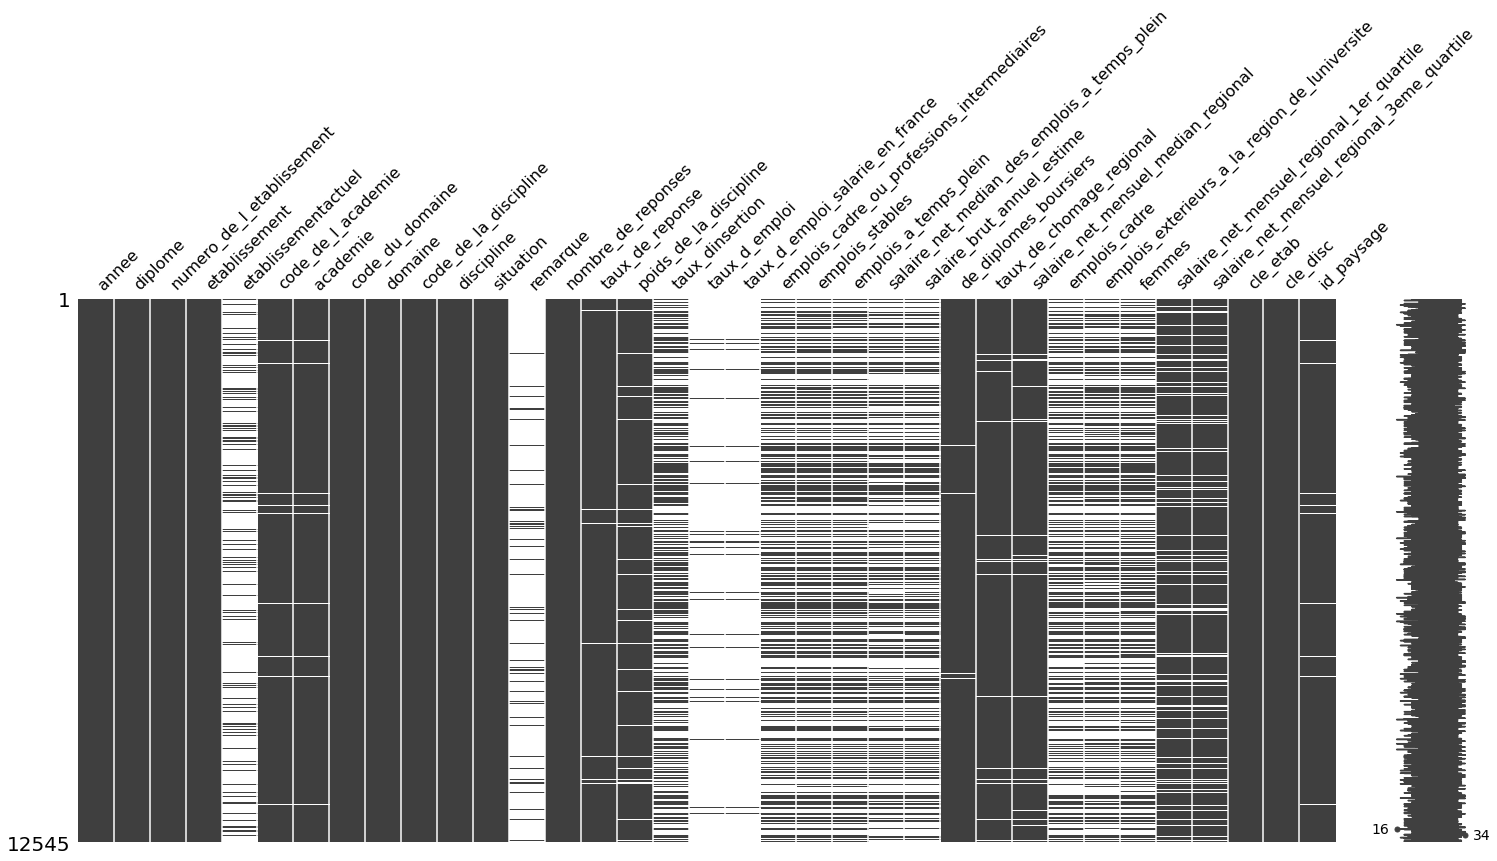

In [8]:
# Missing data matrix plot
msno.matrix(df_train)

In respect to the missing data matrix plot, we decide to remove the columns for which we have a high proportion of missing values (more than 50% of missing values). 

## Feature selection

In this section, we drop columns containing too many missing values, non informative variables or hard to interpret (due to a lack of description of the label after visiting the source website and annexes) and redundant descriptors. 

In [9]:
df_train.columns

Index(['annee', 'diplome', 'numero_de_l_etablissement', 'etablissement',
       'etablissementactuel', 'code_de_l_academie', 'academie',
       'code_du_domaine', 'domaine', 'code_de_la_discipline', 'discipline',
       'situation', 'remarque', 'nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion', 'taux_d_emploi',
       'taux_d_emploi_salarie_en_france',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile', 'cle_etab', 'cle_disc',
       'id_paysage'],
      dtype='object')

In [10]:
# Dropping columns with more than 50% of missing values
to_drop1= ['taux_d_emploi', 'taux_d_emploi_salarie_en_france',
           'remarque', 'etablissementactuel']
df_train.drop(columns=to_drop1, inplace=True)

In [11]:
# Dropping non informative, unknown columns (no description of the column label, hard to interpret)
# and redundant ones.
to_drop2= ['nombre_de_reponses', 'taux_de_reponse', 'id_paysage','cle_etab', 'cle_disc', 
            'numero_de_l_etablissement', 'code_de_l_academie', 'code_du_domaine', 
            'code_de_la_discipline', 'poids_de_la_discipline']
df_train.drop(columns=to_drop2, inplace=True)

In [12]:
print("Number of columns : ", len(df_train.columns))

Number of columns :  21


## Data Visualization

We want to try to predict 'domaine' using our different features. To have a better idea of the relationships between the variables in respect to 'domaine', we decided to do some plots.

In [13]:
df_train["domaine"].value_counts(dropna=False)

domaine
Sciences, technologies et santé    4174
Droit, économie et gestion         3589
Sciences humaines et sociales      3254
Masters enseignement                800
Lettres, langues, arts              728
Name: count, dtype: int64

In [14]:
target_name = "domaine"

categorical_data = [
    "annee",       # we consider 'annee' as categorial 
    "etablissement",
    "academie",
    "situation"
    # "domaine",   # Because target
    # "diplome",   # Because proxy of target
    # "discipline" # proxy
]

numerical_data = [
    "taux_dinsertion", 
    "emplois_cadre_ou_professions_intermediaires",
    "emplois_stables",
    "emplois_a_temps_plein",
    "salaire_net_median_des_emplois_a_temps_plein",
    "salaire_brut_annuel_estime",
    "de_diplomes_boursiers",
    "taux_de_chomage_regional",
    "salaire_net_mensuel_median_regional",
    "emplois_cadre",
    "emplois_exterieurs_a_la_region_de_luniversite",
    "femmes", 
    "salaire_net_mensuel_regional_1er_quartile",
    "salaire_net_mensuel_regional_3eme_quartile",
]

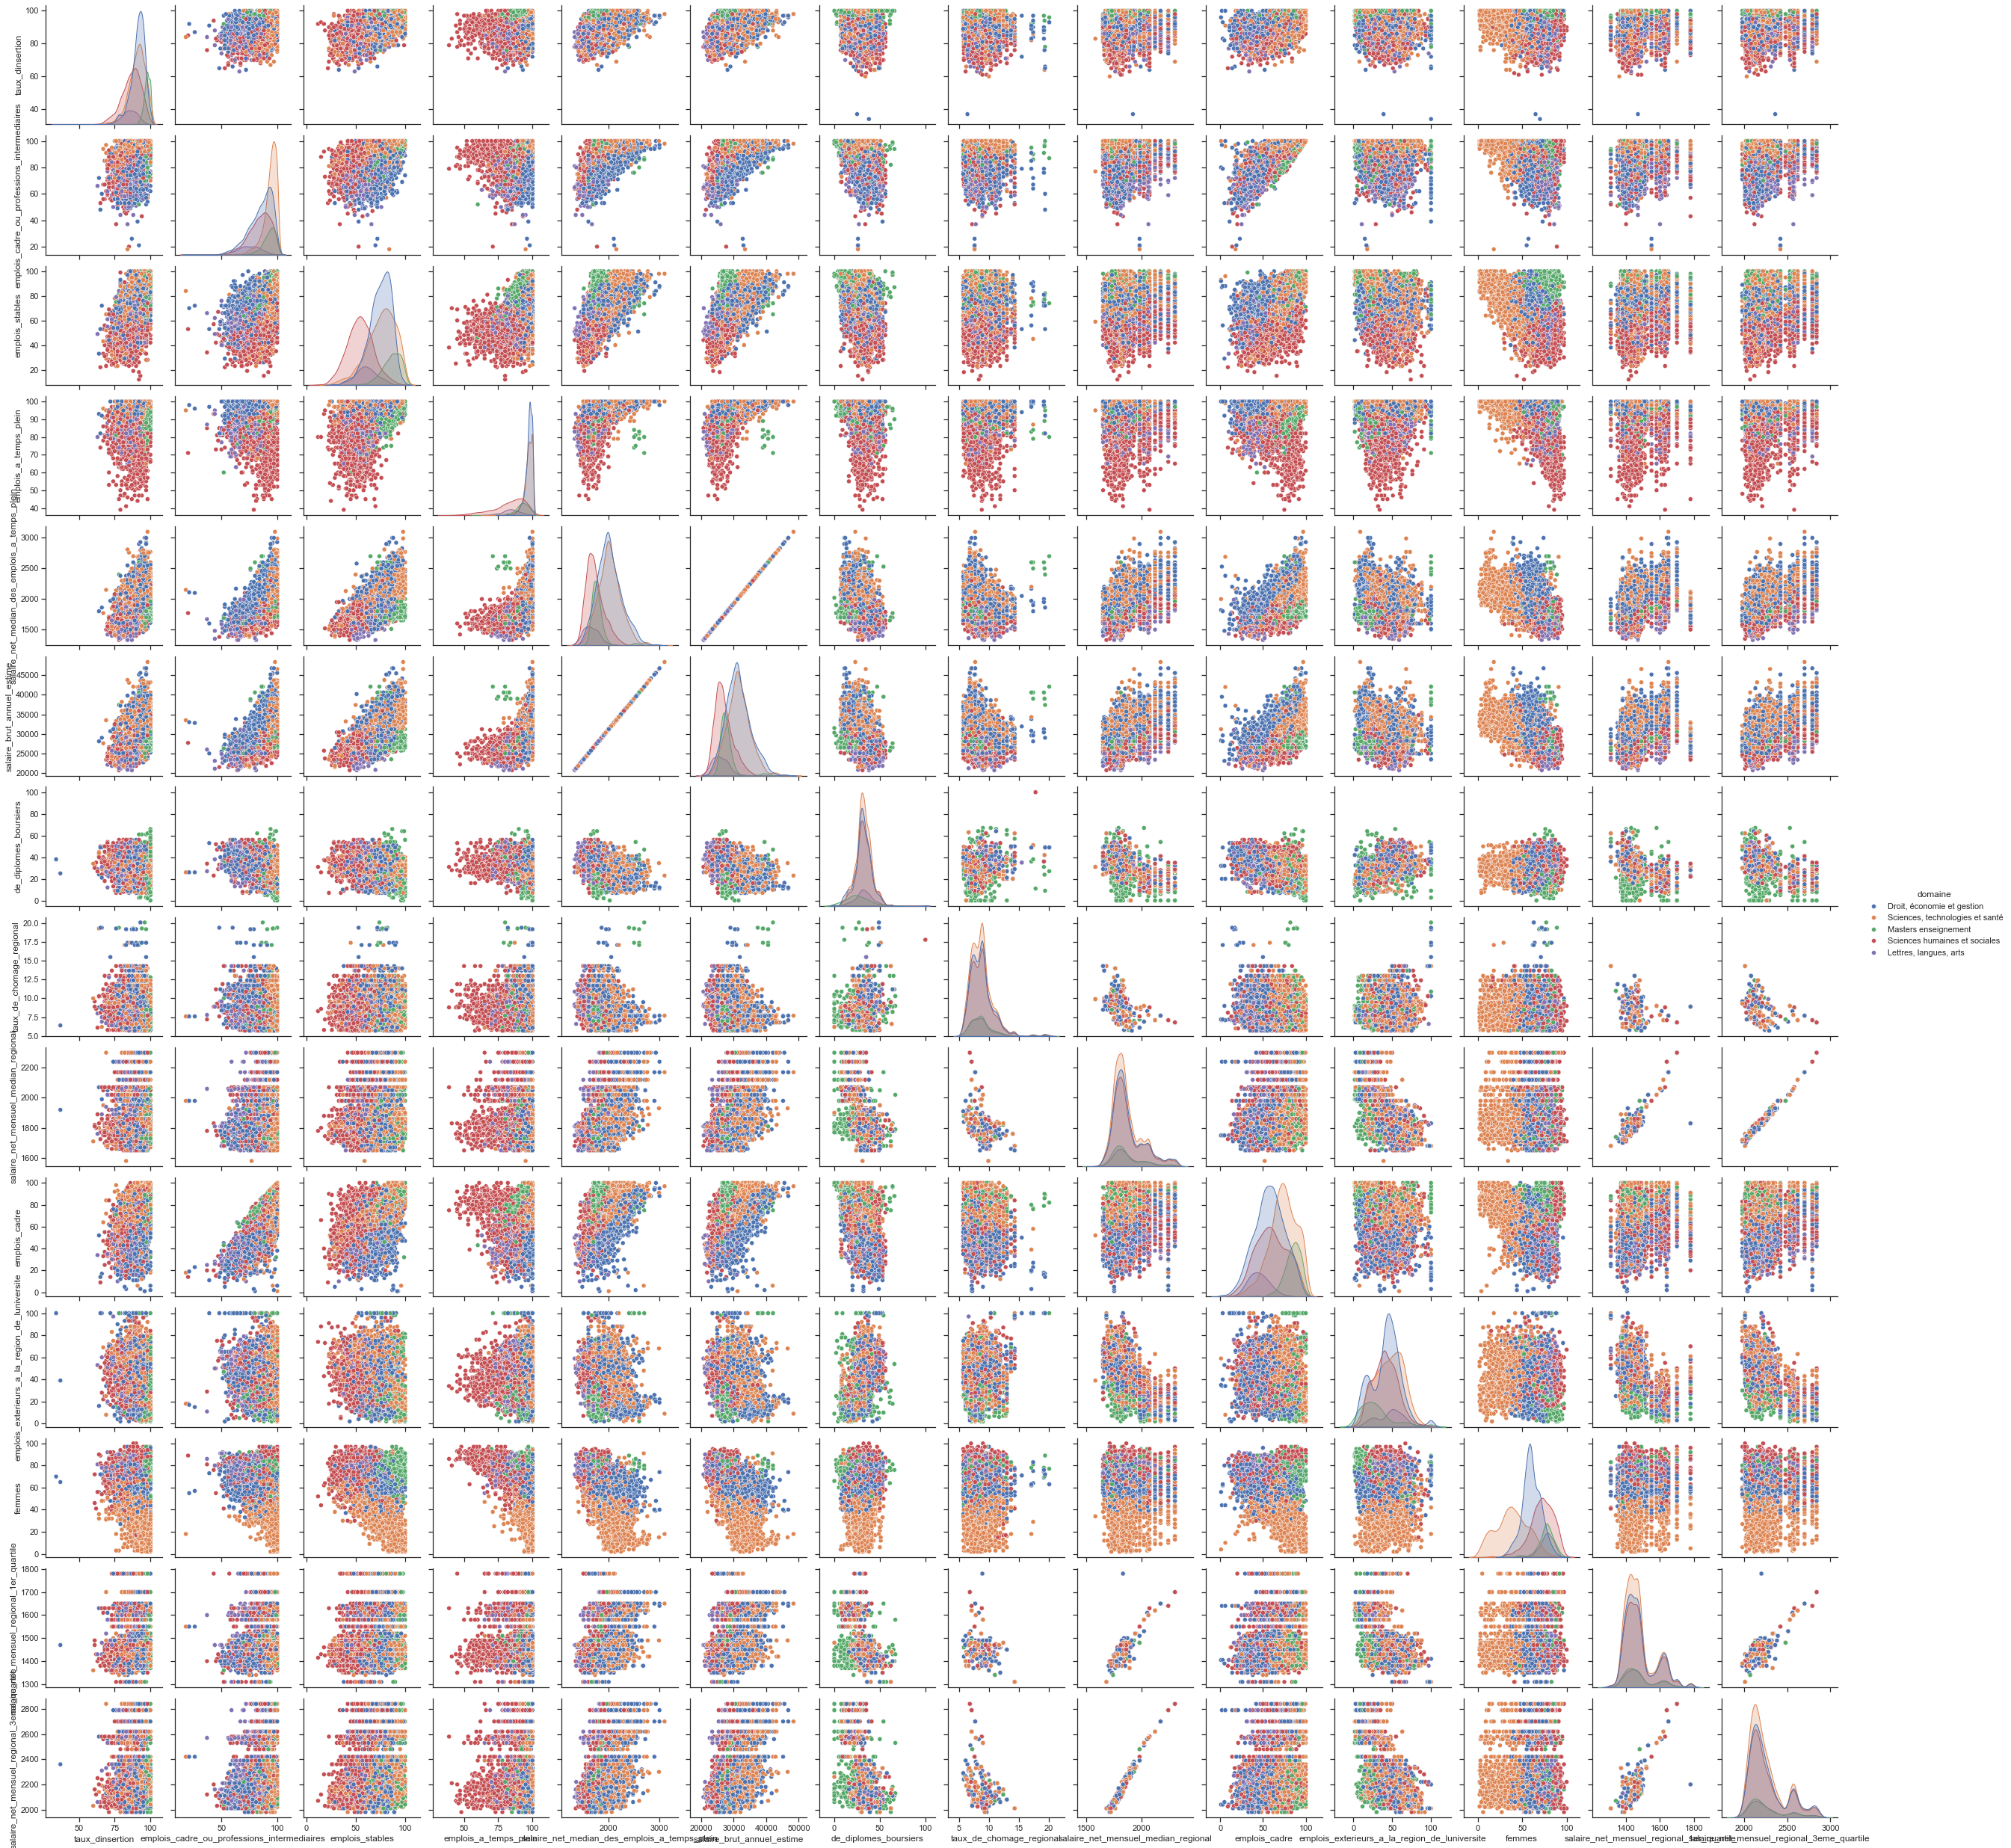

In [15]:
sns.set_theme(style="ticks")

#Creating a subdataset
plots_numerical = df_train[numerical_data].copy()
plots_numerical['domaine'] = df_train['domaine']
#plots_numerical.dtypes

# Pairplots with 'domaine' as categorical
sns.pairplot(plots_numerical, hue="domaine")

As expected, there is a linear relationship between `salaire_net_mensuel_median_regional`, `salaire_net_mensuel_regional_1er_quartile`, `salaire_net_mensuel_regional_3eme_quartile` and `salaire_brut_annuel_estimé`. 

We observe that people in *Lettres, langues et arts* and in *Sciences humaines et sociales* tend to have a lower salary than those in *Droit, économie et gestion* and *Sciences, technologies et santé*. Moreover, we also notice there is a higher proportion of women in *Lettres, langues et arts* and in *Sciences humaines et sociales* than in *Sciences, technologies et santé*.

c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 12.5, 'Estimated annual gross salary')]

c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


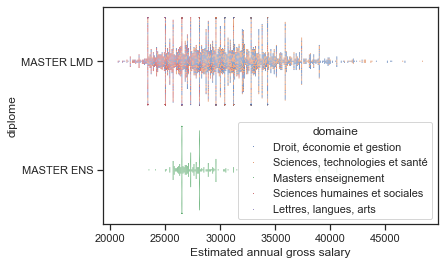

In [16]:
ax = sns.swarmplot(data=df_train, x="salaire_brut_annuel_estime", y="diplome", hue="domaine", size=1)
ax.set(xlabel="Estimated annual gross salary")

We see that the domaine *Masters enseignement* corresponds to people who graduated from a Master ENS. The feature `diplome` should be removed then, as it serves as a virtual proxy to the target.

[Text(0, 0.5, 'Count')]

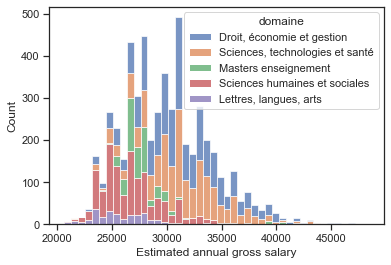

In [17]:
# Categorical histplot to show each observation
ax = sns.histplot(data=df_train, x="salaire_brut_annuel_estime", hue="domaine", multiple="stack")
ax.set(xlabel="Estimated annual gross salary")
ax.set(ylabel="Count")

We also confirm that people who did a Master LMD in *Sciences humaines et sociales* or *Lettres, langues et arts* tend to earn less than those who got a diploma in *Sciences, technologies et santé* or *Droit, économie et gestion*. 

[Text(0, 0.5, 'Count')]

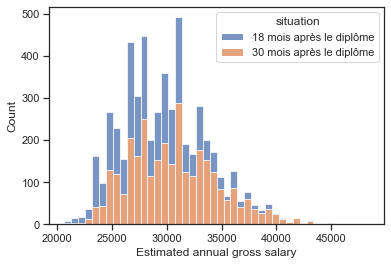

In [18]:
# Categorical histplot to show each observation
ax = sns.histplot(data=df_train, x="salaire_brut_annuel_estime", hue="situation", multiple="stack")
ax.set(xlabel="Estimated annual gross salary")
ax.set(ylabel="Count")

The `situation` does not seem to change the overall distribution of the `salaire_brut_annuel_estime` even though we notice more outliers that shifted to the left of the graph for salaries  *30 mois après le diplôme*.

# Pipeline

We decided to predict `domaine` because we wanted to solve a classification problem. Moreover, we saw on the pairplot that this could be possible to differenciate different `domaine` among the multiple features.

In [19]:
X_train = df_train[categorical_data + numerical_data]
y_train = df_train[target_name]

In [20]:
df_test = pd.read_csv("data/test.csv")

X_test = df_test[categorical_data + numerical_data]
y_test = df_test[target_name]

<Axes: >

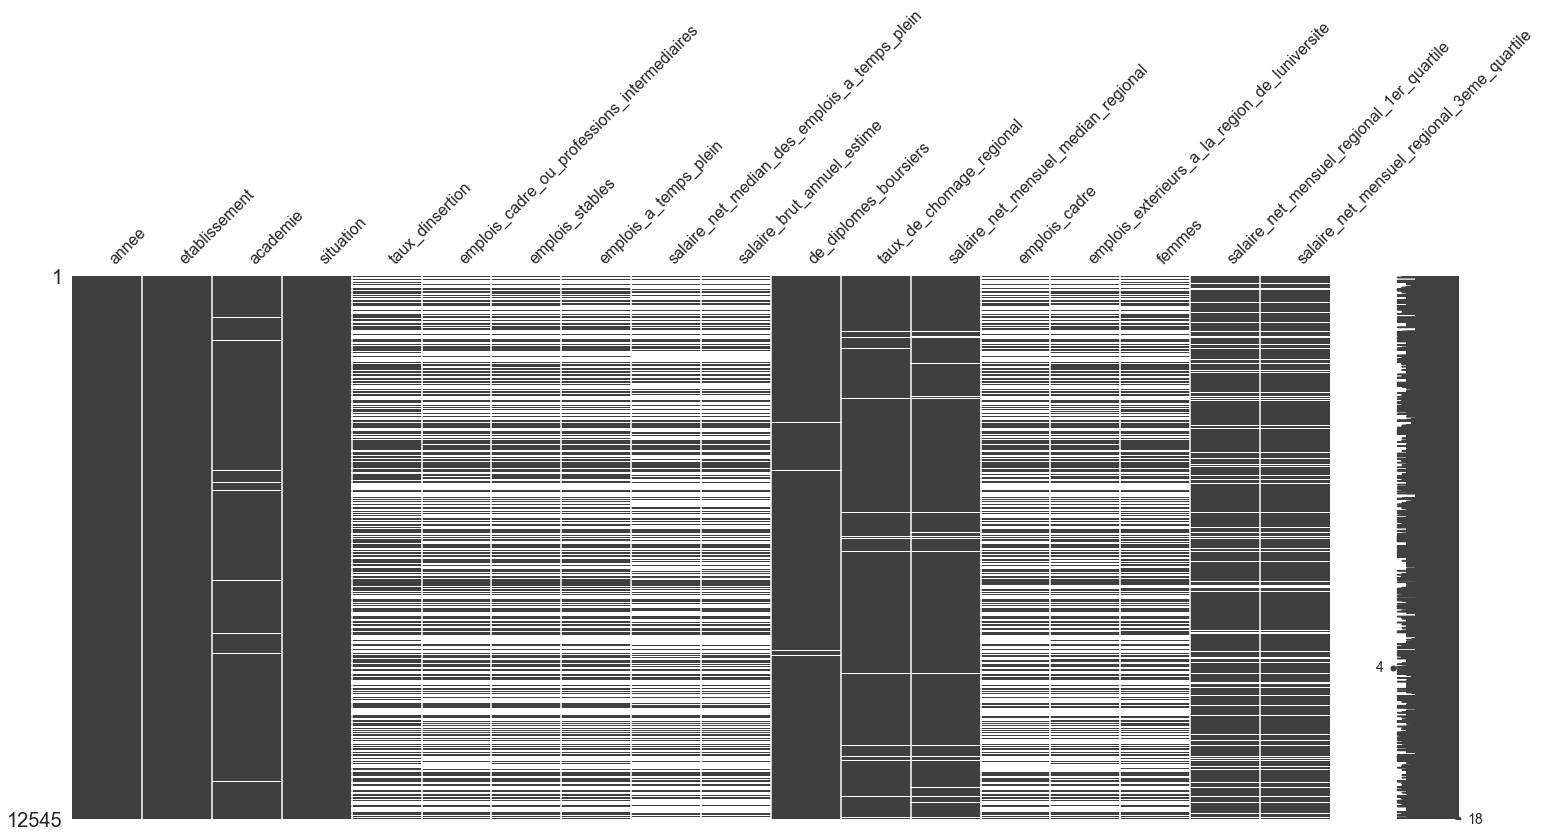

In [21]:
msno.matrix(X_train)

Ici on définira les fonctions de preprocessing pour les attributs catégoriels et numériques.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# OneHot_categorical = []
# Ordinal_categorical = []
# assert len(OneHot_categorical) + len(Ordinal_categorical) == len(categorical_data)

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    #("imputer", IterativeImputer()),  #vous pouvez jouer avec les imputers, KNN, SimpleImputer...
    ("std_scaler", StandardScaler()), # exemple de transformation
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), # vous pouvez utiliser une autre stratégie
    # mais il faudra intervertir le imputer et le onehot car la plupart des imputers nécessitent des 
    # valeurs numériques
    ("one_hot", OneHotEncoder()),

    # exemple de transformation: il faudra probablement faire un encodage différent
    # ou faire un one hot encoding que sur les variables catégorielles qui ont peu de modalités
    # et faire un ordinal encoding sur les autres
    # Ou encore, choisir un autre type de simple imputer
    # cad subdiviser categorical_pipeline en deux !
])

preprocessing_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_data),
    ("catategorical", categorical_pipeline, categorical_data),
])

Ici on créera le pipeline final, qui regroupe le preprocessing et le modèle choisi (régression/classification en fonction du problème).

Le dummy_model est la baseline, le but c'est de faire mieux que lui, encore et encore jusqu'à ce que Sisyphe nous rattrape.

ça sert à rien de faire dans le détail les différents modèles, mais c'est histoire de montrer les possibilités. Si modèle non utilisé, commenter la ligne dans la variable model (cf en dessous)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from sklearn.feature_selection import SelectFromModel 
# si vous voulez utiliser une sélection de variable !
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
# à mettre après le preprocessing, usuellement avant le sampler mais pas obligatoire !
# ça fera des résultats différents cependant

dummy_model = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", DummyClassifier(strategy="stratified"))
])

logistic_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", NearMiss()),
    ("model", LogisticRegression(max_iter=1000))
])

linearSVC_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", NearMiss()),
    ("model", SVC(kernel="linear", class_weight="balanced",max_iter=500, probability=True))
])

random_forest_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", RandomUnderSampler()),
    ("model", RandomForestClassifier(class_weight="balanced")),
]
)

voting_clf = VotingClassifier([
    ("rf", random_forest_model),
    ("logistic", logistic_model), 
    ("linearSVC", linearSVC_model)
], voting="soft")

# comment the lines you don't want to fit later on
models = [
    ("dummy", dummy_model),
    ("logistic", logistic_model),
    ("linearSVC", linearSVC_model),
    ("random_forest", random_forest_model),
#    ("voting_clf", voting_clf) # warning: voting_clf has no attribute 'steps'
                                # cannot run the metrics_with_cross_validation function
]

# Model evaluation

In [24]:
from tqdm import tqdm

for name, model in tqdm(models):
    print(f"\n model {name} training... \n")
    model.fit(X_train, y_train)

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:00,  8.93it/s]


 model dummy training... 


 model logistic training... 



 50%|█████     | 2/4 [00:00<00:01,  1.80it/s]


 model linearSVC training... 



c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 75%|███████▌  | 3/4 [00:17<00:07,  7.64s/it]


 model random_forest training... 



100%|██████████| 4/4 [00:41<00:00, 10.33s/it]


--------------------
model: DummyClassifier(strategy='stratified')
accuracy: 0.2668154287535862
precision: 0.2685495646104439
recall: 0.2668154287535862
f1: 0.26749710551154227
--------------------


<Figure size 1080x1080 with 0 Axes>

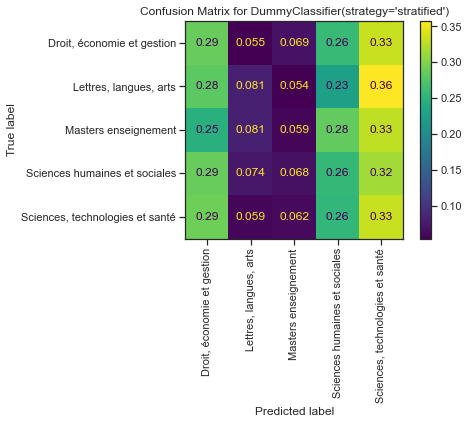

--------------------
model: LogisticRegression(max_iter=1000)
accuracy: 0.598342365317182
precision: 0.6092356442576967
recall: 0.598342365317182
f1: 0.5891869681151963
--------------------


<Figure size 1080x1080 with 0 Axes>

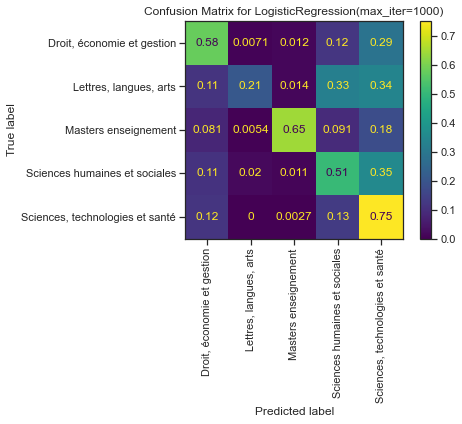

--------------------
model: SVC(class_weight='balanced', kernel='linear', max_iter=500, probability=True)
accuracy: 0.32196365954733824
precision: 0.3521020863795129
recall: 0.32196365954733824
f1: 0.3183563164311519
--------------------


<Figure size 1080x1080 with 0 Axes>

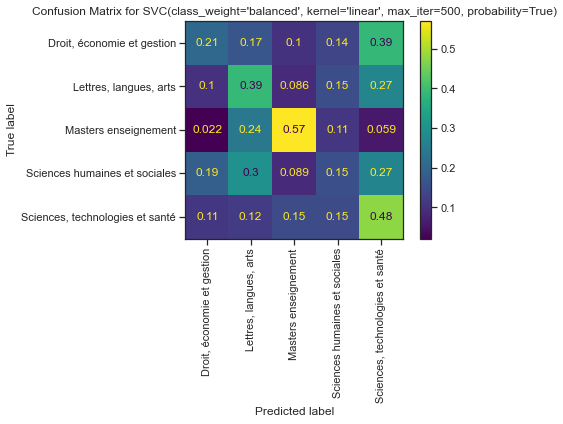

--------------------
model: RandomForestClassifier(class_weight='balanced')
accuracy: 0.5584953777494421
precision: 0.5827858022688147
recall: 0.5584953777494421
f1: 0.5688102437684077
--------------------


<Figure size 1080x1080 with 0 Axes>

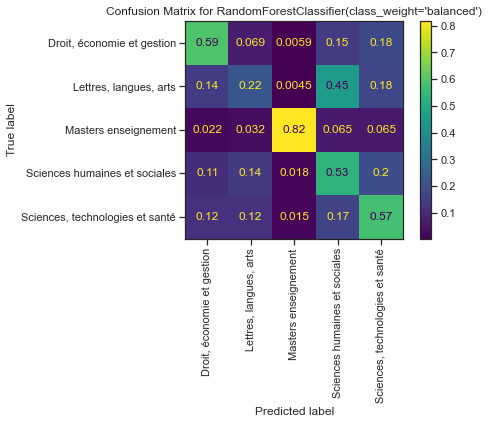

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

def metrics(model, X_test, y_test, plot=True):
    y_pred = model.predict(X_test)
    print("--------------------")
    try:
        model_str = model.steps[-1][1]
    except AttributeError:
        model_str = "Voting classifier"

    print("model:", model_str)
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred, average="weighted"))
    print("recall:", recall_score(y_test, y_pred, average="weighted"))
    print("f1:", f1_score(y_test, y_pred, average="weighted"))
    print("--------------------")
    if plot:
        plt.figure(figsize=(15, 15))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", xticks_rotation="vertical")
        plt.title("Confusion Matrix for " + str(model_str))
        plt.show()
    
for name, model in models:
    metrics(model, X_test, y_test, plot = True)

Explain here how you interpret these results + add maybe features importance in the model etc - check if this is needed for the challenge.

In [26]:
from sklearn.model_selection import cross_val_score

def metrics_with_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("--------------------")
    print("model:", model.steps[1][1])
    print("cross validation scores:", scores)
    print("mean cross validation score:", scores.mean())
    print("--------------------")
    return scores.mean()

best_model = None
best_score = 0

for name, model in tqdm(models):
    score = metrics_with_cross_validation(model, X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = name

print("The model with the highest mean cross-validation score is:", best_model)

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_t

--------------------
model: DummyClassifier(strategy='stratified')
cross validation scores: [0.24522293 0.25              nan        nan 0.28867624]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 913, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)

--------------------
model: LogisticRegression(max_iter=1000)
cross validation scores: [0.5955414  0.57324841        nan        nan 0.58373206]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceba

--------------------
model: SVC(class_weight='balanced', kernel='linear', max_iter=500, probability=True)
cross validation scores: [0.4522293  0.43630573        nan        nan 0.46411483]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 913, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)

--------------------
model: RandomForestClassifier(class_weight='balanced')
cross validation scores: [0.56528662 0.53184713        nan        nan 0.56937799]
mean cross validation score: nan
--------------------
The model with the highest mean cross-validation score is: None


In [27]:
!ramp-test --submission starting_kit

Testing Field of graduate students prediction
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
Traceback (most recent call last):

  File "C:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\rampwf\utils\submission.py", line 121, in train_test_submission
    trained_model = problem.workflow.train_submission(

  File "C:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\rampwf\workflows\classifier.py", line 22, in train_submission
    clf.fit(X_array[train_is], y_array[train_is])

  File "C:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 4096, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]

  File "C:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)

  Fi

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cbc7f11-67c5-4a55-b813-8316a388e7b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>